# Missing data imputation

Missing data imputation refers to filling of unavailable data to complete the dataset. 

## Complete case analysis - ## 
Removing observations which has missing values.
Should be done only when proportion of missing data for the variable is <=5%

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('houseprice.csv')
df.shape

(1460, 81)

In [4]:
contains_null = [x for x in df.columns if df[x].isnull().mean() > 0]
contains_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
data_na = df[contains_null].isnull().mean()
data_na.sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Since first few features has many null values, we cannot apply CCA. 

In [9]:
vars_cca = [x for x in contains_null if df[x].isnull().mean() < 0.05]
vars_cca

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [12]:
#CCA
df_cca = df.dropna(subset=vars_cca)
df.shape

(1460, 81)

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Mean-Median imputation

In [62]:
df_main = pd.read_csv('titanic.csv', usecols=['Survived','Age','Fare'])
df1 = df_main.copy()

In [73]:

df1

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [64]:
df1.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    df1[['Age', 'Fare']],
    df1['Survived'],
    test_size=0.5,  
    random_state=0)  

X_train.shape, X_test.shape

((445, 2), (446, 2))

Imputation values should be counted on the basis of traning data to get a more generalised model and avoid data leakage.

In [66]:
X_train.isnull().mean()

Age     0.191011
Fare    0.000000
dtype: float64

In [67]:
X_train.Age.median()

28.0

In [68]:
#M-M inputation
median_age = X_train.Age.median()
mean_fair = X_train.Fare.mean()
mean_fair=np.round(mean_fair,1)
X_train['Age'].fillna(median_age,inplace=True)
X_train['Fare'].fillna(mean_fair,inplace=True)
#imputer = SimpleImputer(strategy='median')

In [76]:
print('Original variable variance: ', df_main['Fare'].var())
print('Variance after median imputation: ', X_train['Fare'].var()) 

Original variable variance:  2469.436845743117
Variance after median imputation:  2712.273441370885


<AxesSubplot:ylabel='Density'>

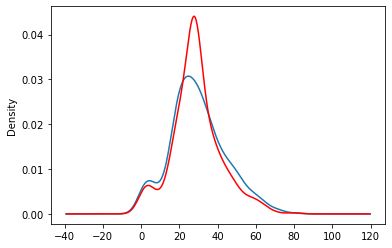

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_main['Age'].plot(kind='kde', ax=ax) #orginal
X_train['Age'].plot(kind='kde', ax=ax, color='red')

## Arbiratry value - imputation. 
Rather than replacing with median,mean Replace with exact value that is required. Should be used when data is not missing at random. 

In [69]:
df2 = df_main.copy()

In [75]:
df2['Age'].fillna(30,inplace = True) #replaced age with a value 30
#imputer = SimpleImputer(strategy='constant', 
 #                      fill_value = 999)

## Additional methods for missing data imputation are - 
 ### 1. Frequent category imputation. 
 ### 2. Random sample imputation. 
 ### 3. End distribution imputation. 

It should be noted that though missing data imputation solves the purpose of data unavailability, there can be scenarios where number of outliers increase in the data.